In [0]:
4pip install google_images_download

     |████████████████████████████████| 911kB 21.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=47d2019fbd614485b8d2a582f58bb7fa29eb5af5eba7e1240a180bd8364215d5
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from fastai.vision import *

In [0]:
classes=['dhaniya','pudina']

In [0]:
for class_name in classes:
  assert os.path.isfile(class_name + '.txt')

In [0]:
data_folder= Path('data/')

for class_name in classes:
  class_folder = data_folder/class_name
  class_folder.mkdir(parents=True,exist_ok=True)
  shutil.copy(class_name+'.txt',class_folder)

In [0]:
for class_folder in classes:
  print(class_folder)
  file_name=class_folder  + ".txt"
  download_images(data_folder/class_folder/file_name,data_folder/class_folder,max_pics=196)

dhaniya


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(data_folder,train=".",valid_pct=0.2,\
                                  ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['dhaniya', 'pudina']

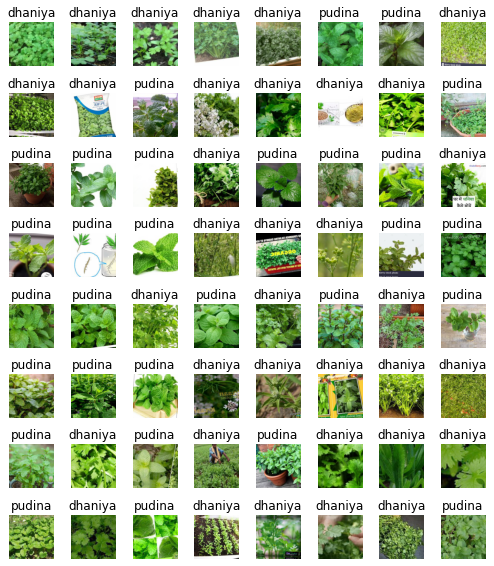

In [0]:
data.show_batch(rows=8,figsize=(7,8))

In [0]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['dhaniya', 'pudina'], 2, 256, 64)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.051816,0.446608,0.203125,00:04
1,0.717341,0.340877,0.125000,00:03
2,0.591669,0.427673,0.156250,00:03
3,0.504401,0.411653,0.093750,00:03


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


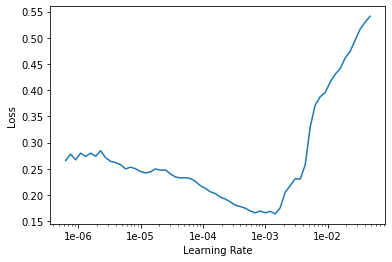

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(3e-05,3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.277405,0.816342,0.156250,00:04
1,0.305280,1.114129,0.125000,00:04


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pudina,pudina,pudina,pudina,pudina
Path: data;

Valid: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dhaniya,dhaniya,pudina,pudina,pudina
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [0]:
interp =ClassificationInterpretation.from_learner(learn)

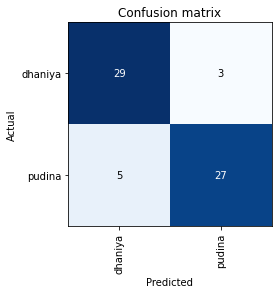

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db= (ImageList.from_folder(data_folder).split_none().label_from_folder().transform(get_transforms(),size=224).databunch())


In [0]:
learn_cln =cnn_learner(db,models.resnet34,metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pudina,pudina,pudina,pudina,pudina
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [0]:
ds,idxs=DatasetFormatter().from_toplosses(learn_cln)

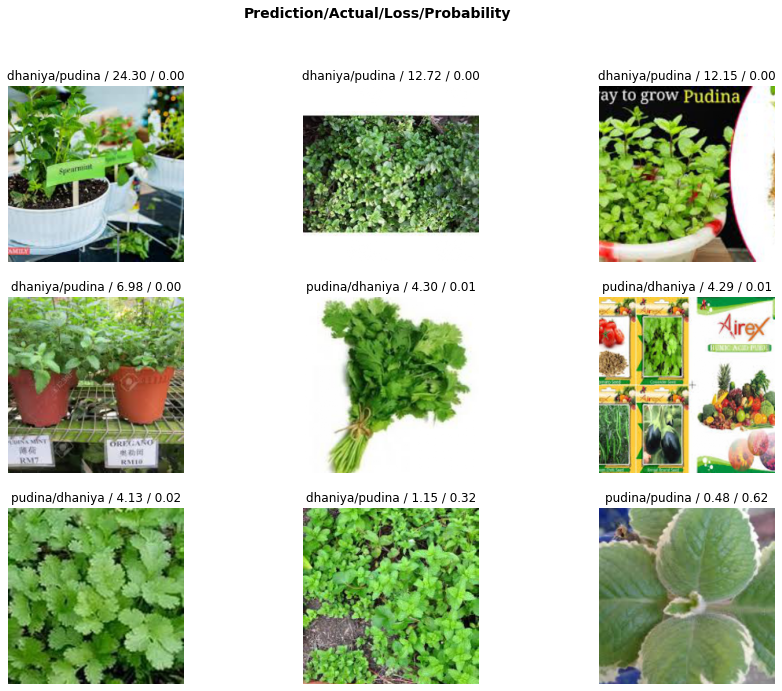

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
learn.export()

In [0]:
defaults.device=torch.device('cpu')

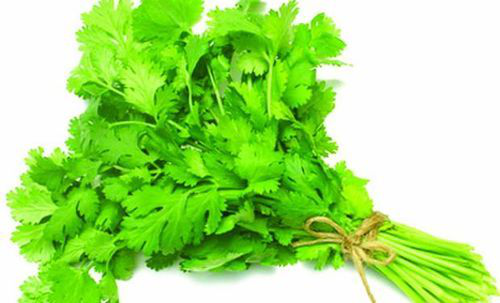

In [0]:
image=open_image(data_folder/'dhaniya.jpg')
image

In [0]:
learn=load_learner(data_folder)

In [0]:
pred_class,pred_idx,outputs =learn.predict(image)
pred_class

Category dhaniya

In [0]:
learn1 = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn1.fit_one_cycle(4,max_lr=slice(3e-05,8e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.931024,0.744348,0.187500,00:04
1,0.642645,0.637060,0.093750,00:04
2,0.511571,0.785216,0.109375,00:04
3,0.449306,0.767064,0.125000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.277405,0.816342,0.156250,00:04
1,0.305280,1.114129,0.125000,00:04
